# Variables impacting the loan status and the borrower rate

## Investigation Overview

In this investigation, I wanted to look at the different variables that could have an impact of a loan status and on the borrower rate.

## Dataset Overview

The data consisted of variables caracterising approximately 110,000 loans from the propser datasets. Their were originaly around 80 variables caracterising a loan. I decided to focus on only a few variables that I thought could have the most influence on the loan status and the borrower rate. The data was cleaned and tidied due to inconsistencies or missing information.

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import loanDFWrangle

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

base_color = sb.color_palette()[0]

# Read propser loan cleaned DataFrame from the created csv file from the data_exploration.ipynb notebook
df_loan_data = pd.read_csv('prosperLoanDataCleanedPostExplor.csv')

# Transform object variables into category
loanDFWrangle.categorizeVariables(df_loan_data)
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110242 entries, 0 to 110241
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BorrowerRate            110242 non-null  float64       
 1   Occupation              110242 non-null  category      
 2   IsBorrowerHomeowner     110242 non-null  bool          
 3   StatedMonthlyIncome     110242 non-null  float64       
 4   LoanOriginalAmount      110242 non-null  int64         
 5   LoanOriginationDate     110242 non-null  datetime64[ns]
 6   CreditScoreRangeAvg     110242 non-null  float64       
 7   ListingCategory         110242 non-null  category      
 8   LoanStatusSimplified    110242 non-null  category      
 9   HasPastDelinquencies    110242 non-null  bool          
 10  LoanAmount2IncomeRatio  110242 non-null  float64       
 11  HasRecommendation       110242 non-null  bool          
dtypes: bool(3), category(3), datet

## Distribution of the loan status
There are 5 different loan statuses:
* Payments Stopped: The borrower completely stopped his payments.
* Past Due: The borrower is from 1 to 120 days late with his payments.
* Ongoing: The borrower is currently reimbursing the loan.
* Completed: The loan is closed

Most of the loans are ongoing or completed, but there are enough payments stopped statuses to investigate what causes the borrower to stop paying.

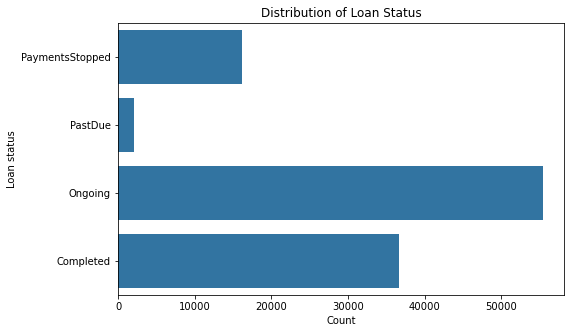

In [9]:
# Count plot of simplified loan statuses
plt.figure(figsize=[8, 5]);
sb.countplot(data=df_loan_data, y='LoanStatusSimplified', color=base_color);
plt.title('Distribution of Loan Status');
plt.ylabel('Loan status');
plt.xlabel('Count');
plt.show()

## Distribution of the borrower Rate
The rates are evolving from 0.05 to 0.35 with a median at 0.18.
We can notice that the rate distribution is normal and quite symetric, with a slight skew to the right and almost unimodal, except for 2 pikes between 0.3 and 0.35.  

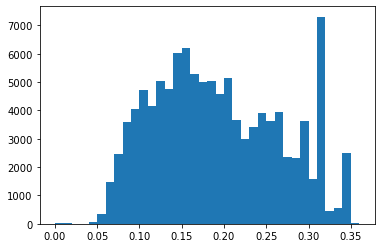

In [10]:
# Histogram of the borrower rate
bin_step = 0.01
bins = np.arange(df_loan_data.BorrowerRate.min(), df_loan_data.BorrowerRate.max() + bin_step, bin_step);
plt.hist(data=df_loan_data, x='BorrowerRate', color=base_color, bins=bins);